# Homework 4b
code is as solid as a wet noodle at best

In [94]:
import numpy as np
import pandas as pd
import math as mth
import random
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


made the colors thing so it can be pretty on output the send is there because depending
on the position of the centriod this code breaks and i cant figure it out all i know is it gets
set to nan

In [95]:
df = pd.DataFrame({
    'x': [5, 10, 15, 24, 30, 55, 60, 71, 80, 85],
    'y': [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]
})
colors = {1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'c', 6: 'y'}
random.seed(200)

In [96]:
def distance(xy, mu):
    return np.sqrt(np.sum((xy.sub(mu)) ** 2, axis=1))

In [97]:
def makecentriods(k):
    centroids = {
        i+1: [random.randint(0, 80), random.randint(0, 80)]
        for i in range(k)
    }
    return centroids

In [98]:
def mean(x):
    return (sum(x) / len(x)) if len(x) != 0 else (sum(x) / 1)

In [99]:
def assign_cluster(df, centroids):
    for i in centroids.keys():
        df['dist{}'.format(i)] = (
            distance(df[['x', 'y']], centroids[i])
        )
    centroid_distance_cols = ['dist{}'.format(i) for i in centroids.keys()]
    df['closest_node'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) 
    df['closest_node'] = df['closest_node'].map(lambda x: int(x.lstrip('dist'))) 
    df['color'] = df['closest_node'].map(lambda x: colors[x])
    return df

In [100]:
def calculate_new_centroid(centroids):
    for i in centroids.keys():
        centroids[i][0] = mean(df[df['closest_node'] == i]['x'])
        centroids[i][1] = mean(df[df['closest_node'] == i]['y'])
    return centroids

In [101]:
def do_cluster(df, k):
    centroids = makecentriods(k)
    df = assign_cluster(df, centroids)
    while True:
        prev_closest_centroids = df['closest_node']
        centroids = calculate_new_centroid(centroids)
        df = assign_cluster(df, centroids)
        if prev_closest_centroids.equals(df['closest_node']):
            break
    plt.scatter(df['x'], df['y'], color=df['color'],
                alpha=0.2, edgecolor='k')
    for i in centroids.keys():
        x, y = centroids[i]
        plt.scatter(x, y, s=100, color='green')
    print(df)
    plt.show()

im afraid to touch this code it might break

    x   y      dist1      dist2  closest_node color
0   5   3  96.542633  18.309560             2     g
1  10  15  84.431511   7.088018             2     g
2  15  12  83.161770   5.314132             2     g
3  24  10  79.095385  10.041912             2     g
4  30  45  49.685813  30.955452             2     g
5  55  52  26.905018  51.809652             1     r
6  60  78  10.884852  74.747843             1     r
7  71  80   5.854912  83.106197             1     r
8  80  91  19.449422  97.315158             1     r
9  85  70  15.384408  86.372681             1     r


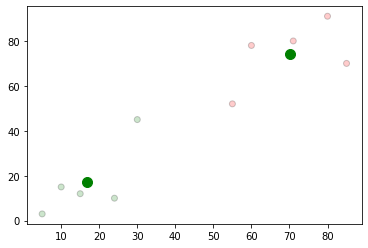

In [102]:
do_cluster(df, k=2)

    x   y       dist1      dist2  closest_node color       dist3
0   5   3  103.206407  58.961852             3     b   11.011358
1  10  15   91.041543  46.674404             3     b    6.103278
2  15  12   89.839092  45.700109             3     b    2.500000
3  24  10   85.819942  42.714166             3     b   10.500000
4  30  45   56.067482  12.980755             2     g   38.694315
5  55  52   33.631273  12.980755             2     g   59.044475
6  60  78   14.108951  34.300146             1     r   82.378699
7  71  80    3.010399  42.479407             1     r   90.588355
8  80  91   12.750000  56.678920             1     r  104.801002
9  85  70   14.699065  47.628773             1     r   93.339434


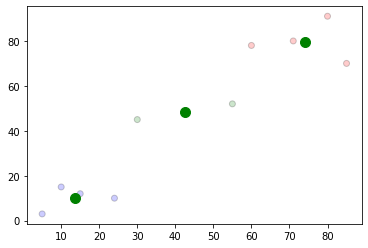

In [103]:
do_cluster(df, k=3)